In [4]:
import pandas as pd

### Load in poverty data and do some level one analysis

In [41]:
df_poverty = pd.read_csv('./ACS_17_5YR_S1701_with_ann.csv', usecols=['GEO.id2','HC02_EST_VC01','HC02_MOE_VC01'])

/anaconda3/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
df_poverty.drop([0], inplace=True)

In [43]:
type(df_poverty)
df_poverty.dtypes

GEO.id2          object
HC02_EST_VC01    object
HC02_MOE_VC01    object
dtype: object

In [44]:
df_poverty['HC02_EST_VC01']=df_poverty['HC02_EST_VC01'].astype(int)
df_poverty['HC02_MOE_VC01']=df_poverty['HC02_MOE_VC01'].astype(int)
df_poverty['GEO.id2']=df_poverty['GEO.id2'].astype(int)

In [45]:
print(df_poverty['HC02_EST_VC01'].min())
print(df_poverty['HC02_EST_VC01'].max())
print(df_poverty['HC02_EST_VC01'].median())

10
1688505
4119.5


In [46]:
df_poverty.rename(columns={'GEO.id2' : 'FIPS' ,'HC02_EST_VC01':'count_below_poverty' , 'HC02_MOE_VC01':'margin_of_error'}, inplace=True)

In [47]:
import seaborn as sns

/anaconda3/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


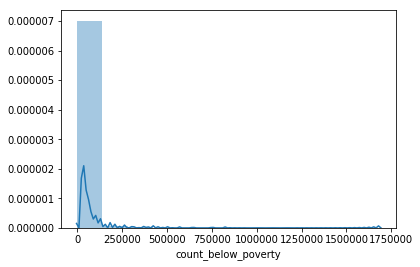

In [49]:
sns.distplot(df_poverty['count_below_poverty'], bins=12)

In [14]:
df_socap = pd.read_csv('./socap_csv')

In [15]:
df_socap.rename(columns={'GEO.id2' : 'FIPS'}, inplace=True)

In [16]:
print(df_socap.shape)
print(df_poverty.shape)

(3139, 67)
(3142, 3)


In [17]:
df_socap_short = df_socap.drop(columns=['Alt FIPS Code', 'County, State', 'State', 'State Abbreviation',
       'County', 'County, State Abbreviation', 'Penn State index',
       'Unemployment rate', 'Prime-age male labor force participation',
       '% Teens idle', 'Poverty rate', 'Gini coefficient',
       'Relative immobility', '% adults graduated high school',
       '% adults with BA', 'On-time high school graduation rate',
       '% in fair or poor health', '% obese', '% without health insurance',
       '% foreign born', 'Population', 'Density', '% rural',
       '% of housing owner-occupied', 'Net migration', 'Average temperature',
       'County-Level Index', 'Requiring all 4 Subindices',
       'Excluding Collective Efficacy', 'Family Unity', 'Community Health',
       'Institutional Health', 'Collective Efficacy',
       'Non-religious non-profit organizations p 1,000',
       'Religious congregations p 1,000', 'Informal Civic Engagement Subindex',
       'Presidential election voting rate, 2012 & 2016',
       'Mail-back census response rate', 'Confidence in Institutions Subindex',
       'Violent Crimes p 100,000', "% hh's with only one person",
       'Membership Organizations p 1,000',
       'Recreation/leisure establishments p 1,000',
       '"Associations" p 1,000, Penn State method',
       'Non-religious non-profits plus religious congregations p 1,000',
       'Religious adherents p 1,000',
       '% get emotional support sometimes, rarely, or never',
       'Charitable contributions as share of AGI, middle-class itemizers',
       'Share of middle-class itemizers who deducted charitable contributions'])

In [50]:
df_socap_short.head()

,FIPS,County_Name,Religious2014,Civic2014,Business2014,Political2014,Professional2014,Labor2014,Bowling2014,Recreational2014,Golf2014,Sports2014,pop2014,assn2014,pvote2012,respn2010,nccs2014,sk2014
0,1001,"Autauga County, AL",53,7,3,0,1,4,1,5,2,0,55290,1.374570,0.644956,0.78,157,-0.631003
1,1003,"Baldwin County, AL",169,16,9,0,3,1,1,25,7,0,199713,1.156660,0.674735,0.73,718,-0.555396
2,1005,"Barbour County, AL",19,1,1,0,0,0,0,0,1,0,26815,0.820436,0.665031,0.63,92,-0.891036
3,1007,"Bibb County, AL",20,0,1,0,0,0,0,1,1,0,22549,1.020001,0.656838,0.58,54,-0.906582
4,1009,"Blount County, AL",39,0,1,0,0,3,0,3,3,0,57658,0.849839,0.708668,0.80,108,-1.013280


In [19]:
sc_fips_list =list(df_socap_short['FIPS'])
pov_fips_list = list(df_poverty['FIPS'])

In [20]:
# determine which counties are missing from oo

def Diff(li1, li2): 
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2] 
    return li_dif 

Diff(sc_fips_list,pov_fips_list)

[2158, 15005, 46102]

In [51]:
# df.loc[df['column_name'].isin(some_values)]
# locate the counties that are missing from one of the FIPS columns

print(df_poverty.loc[df_poverty['FIPS']==2158])
print(df_poverty.loc[df_poverty['FIPS']==15005])
print(df_poverty.loc[df_poverty['FIPS']==46102])

# missing_fips = [2158, 15005, 46012]
# for fip in missing_fips:
#     print(df_poverty.loc[df_poverty['FIPS']==fip])

    FIPS  count_below_poverty  margin_of_error
82  2158                 3163              132
      FIPS  count_below_poverty  margin_of_error
549  15005                   10                8
       FIPS  count_below_poverty  margin_of_error
2413  46102                 7341              764


## The poverty dataframe has three more counties than the social capital dataframe.  Lets' drop those counties so we can merge the poverty data onto the dataframe. 

In [52]:
# lets take a quick look at the head of poverty
df_poverty.head()

,FIPS,count_below_poverty,margin_of_error
1,1001,7483,1204
2,1003,23728,2484
3,1005,6332,723
4,1007,3133,639
5,1009,8919,1005


In [62]:
df_good_poverty = df_poverty.drop([82,549,2413])

In [111]:
# df_extra_counties = df_poverty.loc[df_poverty['FIPS']==[82,549,2413]]
# df_extra_counties

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-57-2970368d6b85> in <module>
----> 1 df_extra_counties = df_poverty.loc[df_poverty['FIPS']==[82,549,2413]]
      2 df_extra_counties

/anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py in wrapper(self, other, axis)
   1281 
   1282             with np.errstate(all='ignore'):
-> 1283                 res = na_op(values, other)
   1284             if is_scalar(res):
   1285                 raise TypeError('Could not compare {typ} type with Series'

/anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py in na_op(x, y)
   1167                     result = method(y)
   1168                 if result is NotImplemented:
-> 1169                     raise TypeError("invalid type comparison")
   1170             else:
   1171                 result = op(x, y)

TypeError: invalid type comparison

SyntaxError: invalid syntax (<ipython-input-111-779dfdba0dbc>, line 4)

In [64]:
df = df_good_poverty.merge(df_socap_short)

In [65]:
df.head()

,FIPS,count_below_poverty,margin_of_error,County_Name,Religious2014,Civic2014,Business2014,Political2014,Professional2014,Labor2014,Bowling2014,Recreational2014,Golf2014,Sports2014,pop2014,assn2014,pvote2012,respn2010,nccs2014,sk2014
0,1001,7483,1204,"Autauga County, AL",53,7,3,0,1,4,1,5,2,0,55290,1.374570,0.644956,0.78,157,-0.631003
1,1003,23728,2484,"Baldwin County, AL",169,16,9,0,3,1,1,25,7,0,199713,1.156660,0.674735,0.73,718,-0.555396
2,1005,6332,723,"Barbour County, AL",19,1,1,0,0,0,0,0,1,0,26815,0.820436,0.665031,0.63,92,-0.891036
3,1007,3133,639,"Bibb County, AL",20,0,1,0,0,0,0,1,1,0,22549,1.020001,0.656838,0.58,54,-0.906582
4,1009,8919,1005,"Blount County, AL",39,0,1,0,0,3,0,3,3,0,57658,0.849839,0.708668,0.80,108,-1.013280


In [69]:
print(df['count_below_poverty'].describe())
print(df['count_below_poverty'].min())
print(df['count_below_poverty'].max())

count    3.139000e+03
mean     1.453961e+04
std      5.172535e+04
min      1.000000e+01
25%      1.631000e+03
50%      4.123000e+03
75%      9.918500e+03
max      1.688505e+06
Name: count_below_poverty, dtype: float64
10
1688505


In [70]:
# hi ketan.  it appears as though this measure needs a little work before adding it to the table. i thought of normalizing it. But then I still need to jump to the literature to make sure that when I calculate the score i'm leveraging the 
# operation that best captures the score. 

df['count_below_poverty'].sort_values()

2654         10
2670         12
2536         17
299          19
1743         22
2778         23
2716         29
93           42
2675         42
2417         45
1630         45
2031         46
1654         46
1709         48
1656         49
1703         55
1612         55
2020         57
89           58
71           63
1655         65
2369         67
1710         69
2033         72
1749         75
2597         78
1737         80
2396         80
1605         81
1694         86
         ...   
2503     191520
3084     191973
2065     203877
346      208195
366      209366
2966     212509
2058     225265
194      243040
218      246203
324      262306
2627     263891
2739     264575
1856     277483
1746     304449
2534     304792
1866     317142
217      362215
220      374810
214      378459
2292     393924
1310     413769
1828     422197
221      427031
2576     446611
361      505182
1849     570731
102      644476
2620     751985
608      821572
203     1688505
Name: count_below_povert

In [73]:
# normalized poverty score

df['normed_poverty'] = df['count_below_poverty']/df['pop2014']
df['normed_poverty'].describe()

count    3139.000000
mean        0.153493
std         0.061496
min         0.020536
25%         0.109442
50%         0.145647
75%         0.186894
max         0.511782
Name: normed_poverty, dtype: float64

In [75]:
df.columns

Index(['FIPS', 'count_below_poverty', 'margin_of_error', 'County_Name',
       'Religious2014', 'Civic2014', 'Business2014', 'Political2014',
       'Professional2014', 'Labor2014', 'Bowling2014', 'Recreational2014',
       'Golf2014', 'Sports2014', 'pop2014', 'assn2014', 'pvote2012',
       'respn2010', 'nccs2014', 'sk2014', 'normed_poverty'],
      dtype='object')

In [76]:
df['assn2014'].describe()

count    3139.000000
mean        1.382634
std         0.704349
min         0.000000
25%         0.934182
50%         1.259219
75%         1.658172
max         6.887052
Name: assn2014, dtype: float64

### Create the social connectedness score

In [94]:
df['connectedness_score'] = ((df['Religious2014'] + df['Civic2014'] + df['Political2014'] + df['Professional2014'] + df['Labor2014'] + df['Recreational2014']) / df['pop2014']) * 1000

In [95]:
df['connectedness_score'].describe()

count    3139.000000
mean        1.195076
std         0.590720
min         0.000000
25%         0.819465
50%         1.096255
75%         1.459276
max         5.121639
Name: connectedness_score, dtype: float64

In [109]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 100)

In [103]:
df.sort_values(by=['connectedness_score'], ascending='True').tail(10)

,FIPS,count_below_poverty,margin_of_error,County_Name,Religious2014,Civic2014,Business2014,Political2014,Professional2014,Labor2014,Bowling2014,Recreational2014,Golf2014,Sports2014,pop2014,assn2014,pvote2012,respn2010,nccs2014,sk2014,normed_poverty,connectedness_score
902,20033,134,48,"Comanche County, KS",8,0,1,0,0,0,0,0,1,0,1949,5.130836,0.741214,0.62,18,4.300433,0.068753,4.104669
2880,51133,1654,468,"Northumberland County, VA",21,3,0,0,0,1,0,0,1,0,6052,4.296100,0.792742,0.75,76,4.291953,0.273298,4.130866
964,20157,537,120,"Republic County, KS",17,2,2,0,0,0,0,1,1,0,4773,4.818772,0.706842,0.75,47,3.937941,0.112508,4.190237
283,8079,100,52,"Mineral County, CO",2,1,1,0,0,0,0,0,0,0,695,5.755396,0.776583,0.21,15,7.285863,0.143885,4.316547
2692,48345,136,61,"Motley County, TX",4,1,1,0,0,0,0,0,1,0,1153,6.071119,0.730816,0.47,24,7.155846,0.117953,4.336513
1737,31171,80,37,"Thomas County, NE",3,0,0,0,0,0,0,0,1,0,687,5.822416,0.777143,0.61,13,6.747426,0.116448,4.366812
1999,38023,297,117,"Divide County, ND",6,3,0,0,0,0,0,2,1,0,2429,4.940305,0.668927,0.52,35,4.760436,0.122273,4.528613
934,20097,204,60,"Kiowa County, KS",12,0,1,0,0,0,0,0,1,0,2530,5.533597,0.708359,0.64,39,5.587877,0.080632,4.743083
2007,38039,175,78,"Griggs County, ND",10,0,1,0,0,0,1,1,1,0,2312,6.055363,0.700361,0.63,39,6.277529,0.075692,4.757785
270,8053,98,53,"Hinsdale County, CO",3,1,1,0,0,0,0,0,0,0,781,6.402049,0.810811,0.20,22,9.149195,0.125480,5.121639


In [110]:
df.sort_values(by=['connectedness_score', 'pop2014']).tail(10)

,FIPS,count_below_poverty,margin_of_error,County_Name,Religious2014,Civic2014,Business2014,Political2014,Professional2014,Labor2014,Bowling2014,Recreational2014,Golf2014,Sports2014,pop2014,assn2014,pvote2012,respn2010,nccs2014,sk2014,normed_poverty,connectedness_score
2412,46107,145,51,"Potter County, SD",5,1,0,0,0,0,0,0,1,0,2334,2.999143,0.691537,0.58,29,2.747302,0.062125,2.570694
1608,30025,164,82,"Fallon County, MT",7,1,1,0,0,0,1,0,1,0,3111,3.535841,0.754292,0.65,38,3.426355,0.052716,2.571520
2024,38073,347,93,"Ransom County, ND",8,5,1,0,0,1,0,0,1,0,5437,2.942799,0.591665,0.67,63,2.107820,0.063822,2.574949
858,19143,689,141,"Osceola County, IA",15,1,1,0,0,0,1,0,0,0,6203,2.901822,0.688510,0.74,59,2.087328,0.111075,2.579397
867,19161,913,139,"Sac County, IA",22,1,2,1,0,1,0,1,2,0,10043,2.987155,0.677638,0.76,81,1.861919,0.090909,2.588868
1398,27173,1215,180,"Yellow Medicine County, MN",25,1,3,0,0,0,0,0,2,0,10033,3.089804,0.912062,0.82,106,3.331669,0.121100,2.591448
1895,37015,4102,787,"Bertie County, NC",52,0,1,0,0,0,0,1,2,0,20406,2.744291,0.682695,0.74,68,0.853586,0.201019,2.597275
2407,46097,257,88,"Miner County, SD",5,0,0,0,1,0,0,0,0,0,2309,2.598528,0.636872,0.85,23,1.640750,0.111304,2.598528
950,20129,227,93,"Morton County, KS",8,0,2,0,0,0,0,0,0,0,3075,3.252033,0.652707,0.54,27,2.198266,0.073821,2.601626
1733,31163,318,89,"Sherman County, NE",7,1,0,0,0,0,1,0,0,0,3072,2.929688,0.743802,0.64,23,2.025146,0.103516,2.604167


In [105]:
df['pop2014'].max()

10109436